## Transformasi Data
Transformasi Data adalah proses pembuatan atau modifikasi variabel atau fitur dari sebuah dataset untuk membuat dataset lebih mudah digunakan dan atau lebih akurat, sehingga dapat membuat model yang lebih akurat.

Konstruksi Data dibagi menjadi empat aktivitas utama, yaitu:

- Rekayasa Fitur
- Imputasi
- Handling Outlier
- Dokumentasi Fitur

### 7.1 Rekayasa Fitur
Rekayasa fitur adalah proses penambahan atau modifikasi fitur dengan mengaplikasikan penghitungan matematik, statistika, atau pengetahuan terhadap fitur.

#### 7.1.1 Hands On Coding
Kita akan melakukan proses feature enginnering ke sebuah dataset dibawah ini
Jangan lupa untuk menginstall library pandas menggunakan 'command pip install pandas'


In [1]:
#!pip install --upgrade numpy spacy thinc

In [2]:
#!pip show numpy spacy thinc

In [3]:
#!pip install numpy spacy

In [4]:
from spacy import displacy
import spacy
from matplotlib import pyplot as plt
import cv2
from sklearn.preprocessing import MinMaxScaler
import time
import random
import plotly.express as px
from sklearn.impute import KNNImputer
from keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Sequential
from scipy.stats import pearsonr
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({'Country': ['Afghanistan', 'Cameroon', 'Indonesia', 'Guatemala'], 'UrbanPopulation': [10142913, 15248270, 153983073,
                  8738685], 'RuralPopulation': [28829316, 11242817, 117874900, 8119648], 'SlumPopulation': [7434756, 4981883, 29889391, 3285745]})
df.head()

Country  UrbanPopulation  RuralPopulation  SlumPopulation
0  Afghanistan         10142913         28829316         7434756
1     Cameroon         15248270         11242817         4981883
2    Indonesia        153983073        117874900        29889391
3    Guatemala          8738685          8119648         3285745

Dataset ini mempunyai 4 fitur:

- Country, Nama negara
- UrbanPopulation, populasi manusia yang hidup di daerah urban (perumahan kota)
- RuralPopulation, populasi manusia yang hidup di daerah rural (pinggiran kota)
- SlumPopulation, populasi manusia yang hidup di daerah slum (pemukiman kumuh)

Pertama kita akan menghitung presentase jumlah populasi yang hidup di slum (pemukiman kumuh) dari populasi yang hidup di urban (perumahan kota). Nilai ini didapat menggunakan rumus:

$$
SlumPercentage = \frac{SlumPopulation}{UrbanPopulation} \times 100
$$


In [5]:
df['SlumPopulation'] = round(
    (df['SlumPopulation']/(df['UrbanPopulation']))*100, 2)
df.head()

Country  UrbanPopulation  RuralPopulation  SlumPopulation
0  Afghanistan         10142913         28829316           73.30
1     Cameroon         15248270         11242817           32.67
2    Indonesia        153983073        117874900           19.41
3    Guatemala          8738685          8119648           37.60

Selanjutnya, kita menggabungkan dua fitur (urban dan rural) menjadi satu, dan mengubah nilainya dari jumlah penduduk ke presentase penduduk. Rumusnya cukup simple:

$$
UrbanPercentage = \frac{SUrbanopulation}{UrbanPopulation + RuralPopulation} \times 100
$$


In [6]:
df['UrbanPopulation'] = round(
    (df['UrbanPopulation']/(df['UrbanPopulation']+df['RuralPopulation']))*100, 2)
df.head()

Country  UrbanPopulation  RuralPopulation  SlumPopulation
0  Afghanistan            26.03         28829316           73.30
1     Cameroon            57.56         11242817           32.67
2    Indonesia            56.64        117874900           19.41
3    Guatemala            51.84          8119648           37.60

In [7]:
#hapus kolom SlumPopulation karena nilainya sudah ter-representasikan di kolom UrbanPopulation

df = df.drop(columns=['RuralPopulation'])
df.head()

Country  UrbanPopulation  SlumPopulation
0  Afghanistan            26.03           73.30
1     Cameroon            57.56           32.67
2    Indonesia            56.64           19.41
3    Guatemala            51.84           37.60

Hasilnya, nilai atau value di dataset lebih mudah dibaca, dan dapat direpresentasikan menggunakan fitur yang lebih sedikit. Dataset sudah siap untuk diproses lebih lanjut.

### 7.2 Imputasi
Imputasi adalah proses penggantian nilai data yang hilang dengan data yang baru. Seperti contoh rekayasa fitur sebelumnya, nilai NaN termasuk data yang perlu kita olah.

beberapa hal terkait imputasi antara lain:

- Jenis-jenis imputasi
- Teknik imputasi

### 7.2.1 Jenis-jenis Imputasi
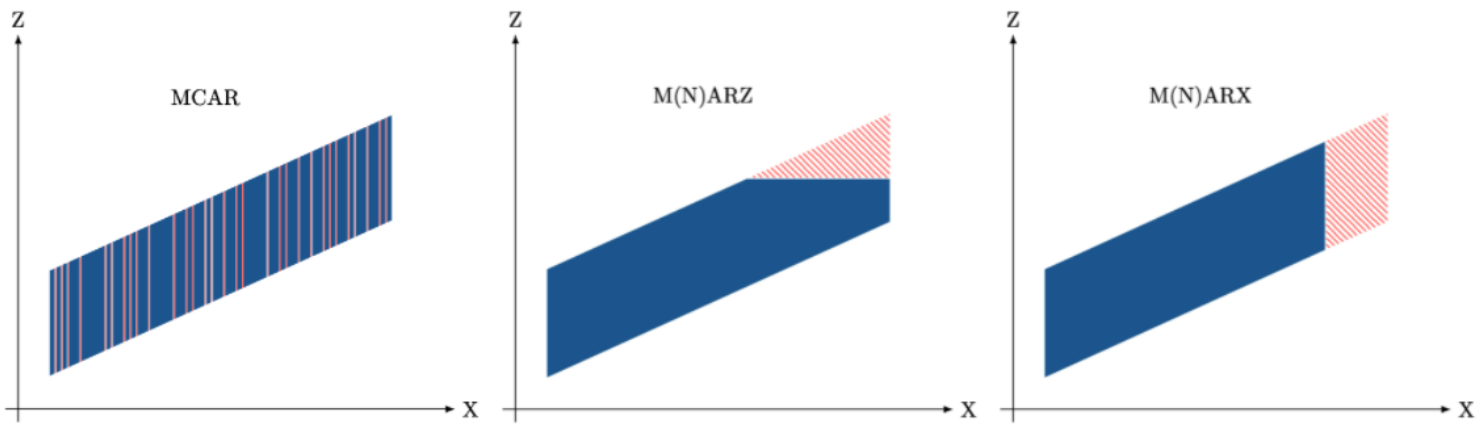

#### 7.2.1.1 Missing Completely At Random (MCAR)
Jika probabilitas hilangnya data dalam suatu fitur **sama antara satu data dengan yang lain.** Asumsi ini dapat diuji dengan memisahkan data yang hilang dan yang lengkap serta memeriksa karakteristik data. Jika karakteristik data tidak sama untuk kedua fitur, asumsi MCAR tidak berlaku
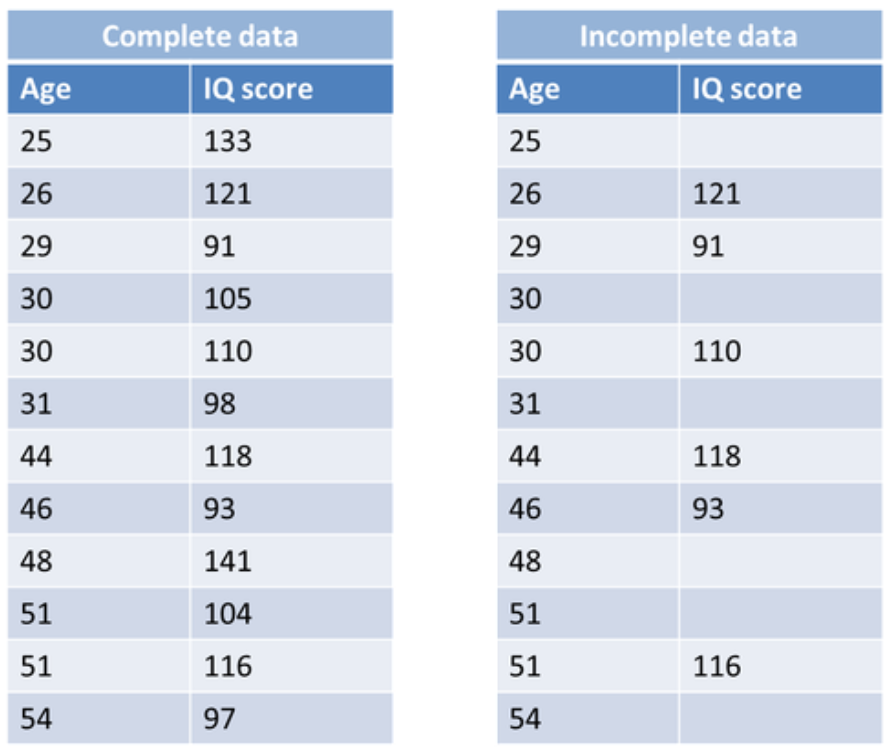


#### 7.2.1.2 Missing At Random (MAR)
Kemungkinan data yang hilang **dipengaruhi oleh variabel lain, namun tidak dipengaruhi oleh variabel yang hilang.** Sebagai contoh, untuk data di samping, hanya peserta dengan umur yang dibawah 31 yang nilainya hilang. Berarti fitur age mempengaruhi probabilitas missing data IQ score.
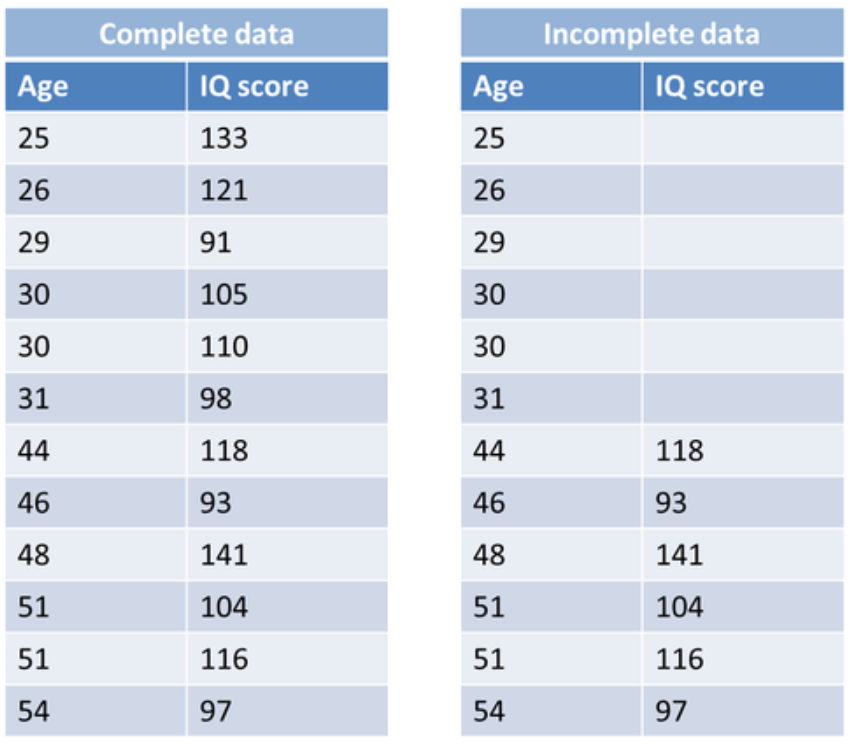

### 7.2.2 Missing Not At Random
Kemungkinan data yang hilang tidak dipengaruhi oleh fitur lain, namun dipengaruhi oleh fitur pada data yang hilang. Sebagai contoh, untuk data di samping, ada kemungkinan bahwa data IQ score yang hilang hanya data yang nilainya dibawah 110. Sedangkan variabel age tidak berpengaruh atas hilangnya data IQ score karena age yang kecil dan besar sama sama mempunyai data yang hilang
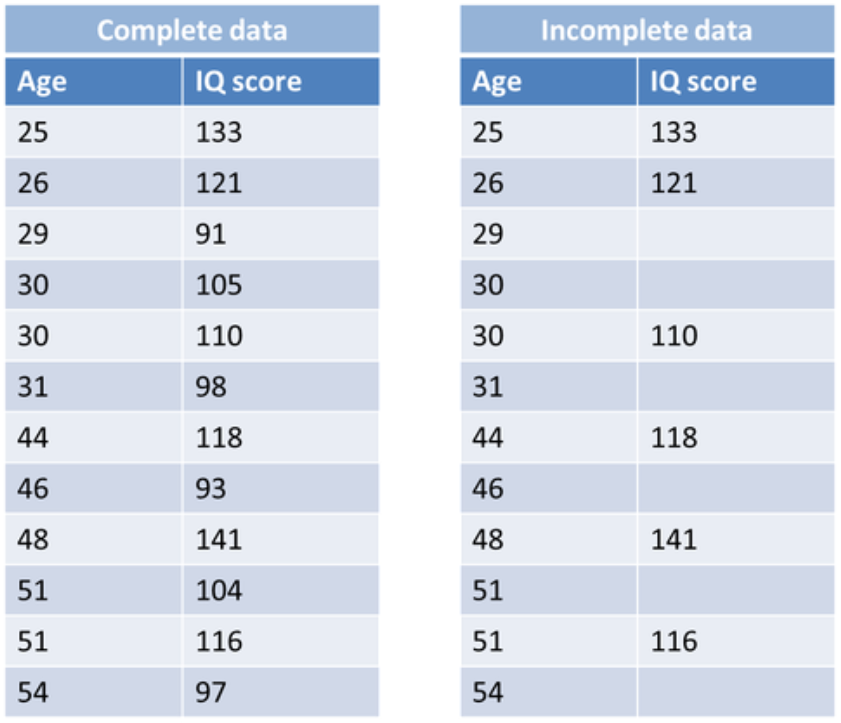

### Teknik-Teknik Imputasi
Perlu diingat bahwa jika 70% data hilang/missing, maka semua fitur(kolom) dan data (row) harus dihapus.
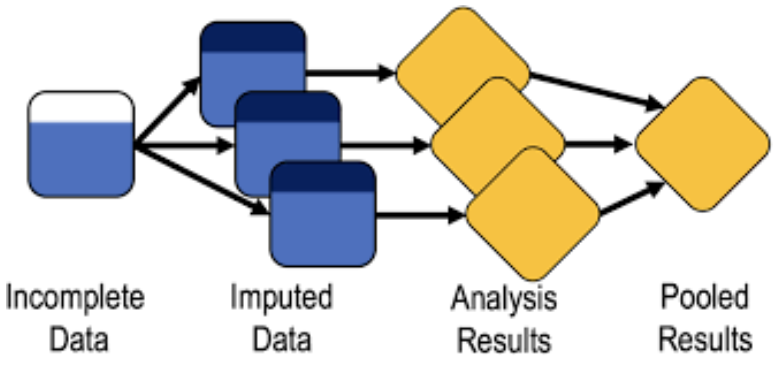

Data yang hilang harus dimutasikan berdasarkan jenis datanya, yaitu :

a. Numerik
- Mean/Median
- Arbitrary
- End of tail
- Regresi
- KNN
  
b. Ketegorik
- Frequent/Modus
- KNN

#### 7.2.3.1 Mean
Dataset imputasi mean adalah metode untuk mengisi nilai yang hilang dalam dataset dengan menggunakan nilai rata-rata (mean) dari variabel yang bersangkutan. Ketika ada nilai yang hilang dalam suatu variabel dalam dataset, imputasi mean menggantikan nilai-nilai yang hilang tersebut dengan nilai rata-rata dari seluruh nilai yang ada dalam variabel tersebut.

a. Kelebihan 
- Mudah dan cepat.
- Bekerja efektif untuk dataset numerik berukuran kecil.
- Cocok untuk variabel numerik.
- Cocok untuk data missing completely at random (MCAR).
- Dapat digunakan dalam produksi (mis. dalam model deployment)

b. Kekurangan
- Tidak memperhitungkan korelasi antar fitur, berfungsi pada tingkat kolom.
- Kurang akurat.
- Tidak memperhitungkan probabilitas/ketidakpastian.
- Tidak cocok utk >5% missing data.

#### 7.2.3.1.1 Hands On Coding

In [9]:
# buat dataset dengan format dataframe
df = pd.DataFrame({'age': [25, 26, 29, 30, 30, 31, 44, 46],
                   'IQ': [np.nan, 121, 91, np.nan, 110, np.nan, 118, 93]})
display(df)

age     IQ
0   25    NaN
1   26  121.0
2   29   91.0
3   30    NaN
4   30  110.0
5   31    NaN
6   44  118.0
7   46   93.0

In [10]:
mean = df['IQ'].mean()
print(f'Mean: {mean}, dibulatkan menjadi {round(mean)}')
display(df)

Mean: 106.6, dibulatkan menjadi 107


age     IQ
0   25    NaN
1   26  121.0
2   29   91.0
3   30    NaN
4   30  110.0
5   31    NaN
6   44  118.0
7   46   93.0

In [11]:
# masukkan nilai mean ke missing value
df['IQ'] = df['IQ'].fillna(round(mean))
display(df)

age     IQ
0   25  107.0
1   26  121.0
2   29   91.0
3   30  107.0
4   30  110.0
5   31  107.0
6   44  118.0
7   46   93.0

#### **7.2.3.2 Arbiter**
Teknik imputasi arbiter (arbiter imputation) adalah metode untuk mengisi nilai yang hilang dalam dataset dengan menggunakan hasil gabungan dari beberapa metode imputasi yang berbeda. Dalam metode ini, beberapa teknik imputasi yang berbeda diterapkan pada dataset yang sama, dan hasil dari setiap teknik imputasi digabungkan menjadi satu nilai yang digunakan untuk mengisi nilai yang hilang.

a. Kelebihan

- Sangat mudah dan cepat
- Cocok untuk missing dataset dengan asumsi tidak missing at random
  
b. Kekurangan

- Mengganggu variansi dan distribusi variable original
- Dapat membentuk outlier
- Semakin besar nilai arbitrary, maka semakin besar distorsi
#### **7.2.3.2.1 Hands On Coding**

In [12]:
# buat dataset dengan format dataframe
df = pd.DataFrame({'age': [25, 26, 29, 30, 30, 31, 44, 46],
                   'IQ': [np.nan, 121, 91, np.nan, 110, np.nan, 118, 93]})
display(df)

age     IQ
0   25    NaN
1   26  121.0
2   29   91.0
3   30    NaN
4   30  110.0
5   31    NaN
6   44  118.0
7   46   93.0

In [13]:
df['IQ'] = df['IQ'].fillna(130)
display(df)

age     IQ
0   25  130.0
1   26  121.0
2   29   91.0
3   30  130.0
4   30  110.0
5   31  130.0
6   44  118.0
7   46   93.0

#### **7.2.3.3 End Of Tail**
Teknik imputasi end of tail adalah metode untuk mengisi nilai yang hilang dalam dataset dengan menggunakan nilai ekstrem (tail) dari distribusi data yang ada. Metode ini didasarkan pada asumsi bahwa nilai yang hilang cenderung berada di ekor distribusi data. Namun untuk teknik ini kita harus mengikuti sebuah ketentuan khusus, yaitu:

**Jika distribusi data bersifat normal, maka gunakan rumus :**
$$
\sigma = \sqrt{\frac{\sum |x - \mu|^2}{N}}
$$

**Jika distribusi data bersifat skewed, maka gunakan rumus IQR proximity**
$$
IQR = Q_3 - Q_1
$$

#### **7.2.3.3.1 Distribusi Normal**
Data yang terdistribusi secara normal, juga dikenal sebagai distribusi Gaussian atau kurva lonceng, mengacu pada distribusi statistik di mana titik-titik data secara simetris terdistribusi di sekitar nilai rata-rata, menciptakan kurva berbentuk lonceng yang khas.
Untuk menghitung data yg mempunyai distribusi normal, kita harus mengetahui standar deviasinya. Berikut rumus untuk menghitung standar deviasi :

$$
\mu + 3 * \sigma
$$

#### **7.2.3.3.2 Distribusi Normal - Hands On Coding**


In [14]:
age = [25, 26, 29, 30, 30, 31, 44, 46, 22, 33,
       35, 27, 21, 23, 45, 47, 41, 38, 37, 21, 24]
data = [85, 90, 95, 95, 100, np.nan, 100, 110, 105, 105, 110,
        np.nan, 110, 110, 115, 115, 115, 120, np.nan, 125, 130]

# make a dataframe
df = pd.DataFrame({'age': age, 'IQ': data})
display(df)

age     IQ
0    25   85.0
1    26   90.0
2    29   95.0
3    30   95.0
4    30  100.0
5    31    NaN
6    44  100.0
7    46  110.0
8    22  105.0
9    33  105.0
10   35  110.0
11   27    NaN
12   21  110.0
13   23  110.0
14   45  115.0
15   47  115.0
16   41  115.0
17   38  120.0
18   37    NaN
19   21  125.0
20   24  130.0

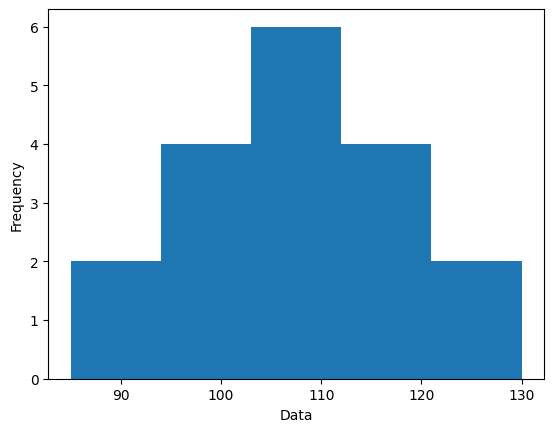

In [15]:
#cek jenis distribusi
data = [85, 90, 95, 95, 100, np.nan, 100, 110, 105, 105, 110,
        np.nan, 110, 110, 115, 115, 115, 120, np.nan, 125, 130]

plt.hist(data, bins=5)
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.show()

Dapat dilihat bahwa grafik histogram membentuk seperti gunung atau lonceng, dengan puncak tepat di tengah-tengah grafik. Inilah salah satu karakteristik dataset dengan distribusi normal.

Selanjutnya, kita akan mencari mean dari dataset

In [16]:
# nilai kosong dihilangkan dari data terlebih dahulu
data = [85, 90, 95, 95, 100, 100, 110, 105, 105,
        110, 110, 110, 115, 115, 115, 120, 125, 130]
mean = np.mean(data)
print(f'Mean dari dataset adalah: ', mean)

Mean dari dataset adalah:  107.5


In [17]:
# hitung jarak antara nilai x dan mean

total = 0
for i in data:
    calc = (107.5-i)**2
    total = total + calc

print(f'jarak antara nilai x dan mean adalah ', total)

jarak antara nilai x dan mean adalah  2412.5


In [18]:
# hitung standar deviasinya
# math.sqrt adalah fungsi untuk melakukan operasi akar pangkat
# round adalah fungsi untuk membulatkan hasil operasi)

stddev = round(math.sqrt(total/len(data)), 2)
print(f'nilai standar deviasi adalah ', stddev)

nilai standar deviasi adalah  11.58


In [19]:
# hitung nilai imputasi End of Tail

imp = round(mean + 3 * stddev, 1)
print(f'nilai imputasi end of tail adalah ', imp)

nilai imputasi end of tail adalah  142.2


In [20]:
# masukkan nilai imputasi end of tail ke dalam dataset

df['IQ'] = df['IQ'].fillna(imp)
display(df)

age     IQ
0    25   85.0
1    26   90.0
2    29   95.0
3    30   95.0
4    30  100.0
5    31  142.2
6    44  100.0
7    46  110.0
8    22  105.0
9    33  105.0
10   35  110.0
11   27  142.2
12   21  110.0
13   23  110.0
14   45  115.0
15   47  115.0
16   41  115.0
17   38  120.0
18   37  142.2
19   21  125.0
20   24  130.0

#### **7.2.3.3.3 Distribusi Skewed**
Distribusi skew atau skewness mengacu pada karakteristik asimetri dalam distribusi data. Dalam distribusi skew, ekor distribusi data cenderung condong ke salah satu sisi, baik ke kanan (positif) atau ke kiri (negatif), dibandingkan dengan pusat distribusi.

**Dalam distribusi skew positif**, ekor distribusi condong ke kanan, sementara nilai-nilai yang lebih kecil cenderung berada di sebelah kiri. Ini menghasilkan ekor yang panjang di sisi kanan distribusi.

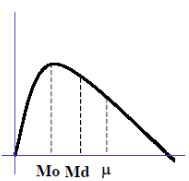

**Dalam distribusi skew negatif**, ekor distribusi condong ke kiri, dengan nilai-nilai yang lebih besar cenderung berada di sebelah kiri. Ini menghasilkan ekor yang panjang di sisi kiri distribusi. Nilai rata-rata akan lebih kecil daripada median dalam distribusi ini.

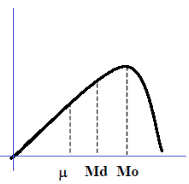

#### **7.2.3.3.4 Distribusi Skewed - Hands On Coding**


In [21]:
# buat data baru yang terdiri dari 21 data dengan 3 missing value
age = [25, 26, 29, 30, 30, 31, 44, 46, 22, 33,
       35, 27, 21, 23, 45, 47, 41, 38, 37, 21, 24]
data = [125, 130, 125, 95, 115, np.nan, 100, np.nan, 130, 110,
        90, 110, 120, 115, 105, 85, 115, 110, 120, 100, np.nan]

df = pd.DataFrame({'age': age, 'IQ': data})
display(df)

age     IQ
0    25  125.0
1    26  130.0
2    29  125.0
3    30   95.0
4    30  115.0
5    31    NaN
6    44  100.0
7    46    NaN
8    22  130.0
9    33  110.0
10   35   90.0
11   27  110.0
12   21  120.0
13   23  115.0
14   45  105.0
15   47   85.0
16   41  115.0
17   38  110.0
18   37  120.0
19   21  100.0
20   24    NaN

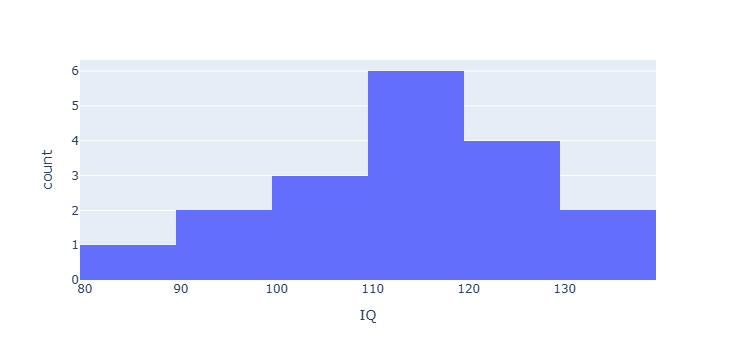

In [22]:
# cek jenis distribusi data

data = [125, 130, 125, 95, 115, 100, 130, 110, 90,
        110, 120, 115, 105, 85, 115, 110, 120, 100]

fig = px.histogram(df, x='IQ')
fig.show()

Distribusi data adalah skew negatif karena puncak dari data berada di sebelah kanan titik tengah. Mari kita hitung nilai imputasi menggunakan rumus IQR.

Inter-Quartile-Range (IQR) adalah sebuah nilai yang digunakan untuk mengukur sebaran data dalam sebuah distribusi.

$$
IQR = Q_3 - Q_1
$$

$$
IQR_{max} = Q_3 + 3 \cdot IQR
$$

$$
IQR_{min} = Q_1 - 3 \cdot IQR
$$

Pertama-tama, kita akan hitung nilai precentile dari dataset, yang dapat kita kalkulasi dengan mudah menggunakan fungsi np.precentile dari library numpy.

In [23]:
median = np.median(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

print(f'Median: {median}')
print(f'Q1: {q1}')
print(f'Q3: {q3}')

Median: 112.5
Q1: 101.25
Q3: 120.0


In [25]:
# hitung nilai IQR, IQRmin, dan IQRmax

iqr = q3 - q1
iqrmin = q1 + 3 * iqr
iqrmax = q3 + 3 * iqr

print(f'IQR: {iqr}')
print(f'IQRmin: {iqrmin}')
print(f'IQRmax: {iqrmax}')

# boleh memilih nilai diantara IQRmin dan IQRmax. 

IQR: 18.75
IQRmin: 157.5
IQRmax: 176.25


In [26]:
# contoh ambil nilai IQRmax

df['IQ'] = df['IQ'].fillna(iqrmax)
display(df)

age      IQ
0    25  125.00
1    26  130.00
2    29  125.00
3    30   95.00
4    30  115.00
5    31  176.25
6    44  100.00
7    46  176.25
8    22  130.00
9    33  110.00
10   35   90.00
11   27  110.00
12   21  120.00
13   23  115.00
14   45  105.00
15   47   85.00
16   41  115.00
17   38  110.00
18   37  120.00
19   21  100.00
20   24  176.25